----

- Heuristic Methods
    - Average Method
    - Naives Forcast Method
    - Naives Seasonal Forcast Method
    - Drift Method
    - SMA-3 Forecast Method
    - SMA-5 Forecast Method
- SES,DES,TES
- STATIONARITY(t-test,ADF)
- ARIMA
- Cuasality
- VAR
- ARCH
- GARCH

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
df = yfinance.download('MSFT',start='2020-01-01',end='2021-06-30')
df = df['Adj Close']
df = pd.DataFrame(df)
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2019-12-31,155.329636
2020-01-02,158.205765
2020-01-03,156.235825
2020-01-06,156.639694
2020-01-07,155.211456
...,...
2021-06-23,265.269989
2021-06-24,266.690002
2021-06-25,265.019989


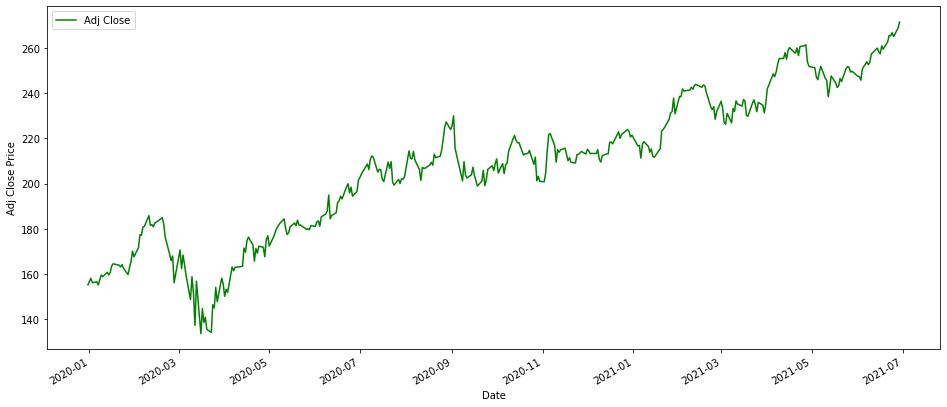

In [3]:
df.plot(figsize=(16,7),linestyle='-',color='g')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

In [4]:
predDf = df.copy()
predDf

,Adj Close
Date,
2019-12-31,155.329636
2020-01-02,158.205765
2020-01-03,156.235825
2020-01-06,156.639694
2020-01-07,155.211456
...,...
2021-06-23,265.269989
2021-06-24,266.690002
2021-06-25,265.019989


In [5]:
train = predDf.iloc[:230,]
test = predDf.iloc[230:,]

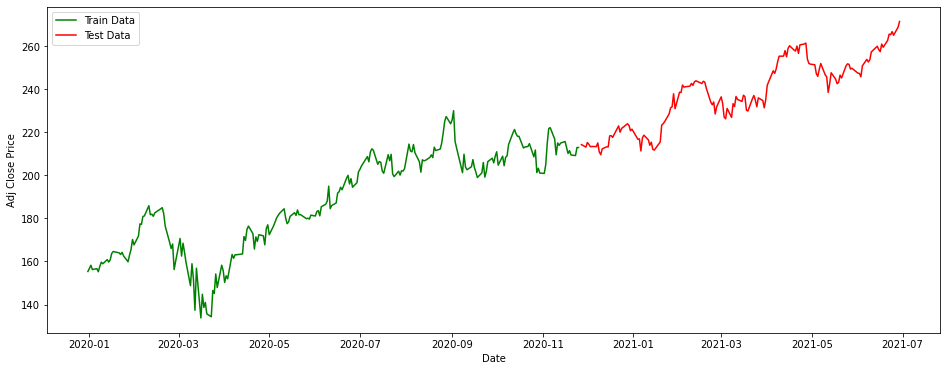

In [6]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [7]:
AvgMeth = test.copy()

AvgMeth['Adj Close'] = float(np.mean(train))

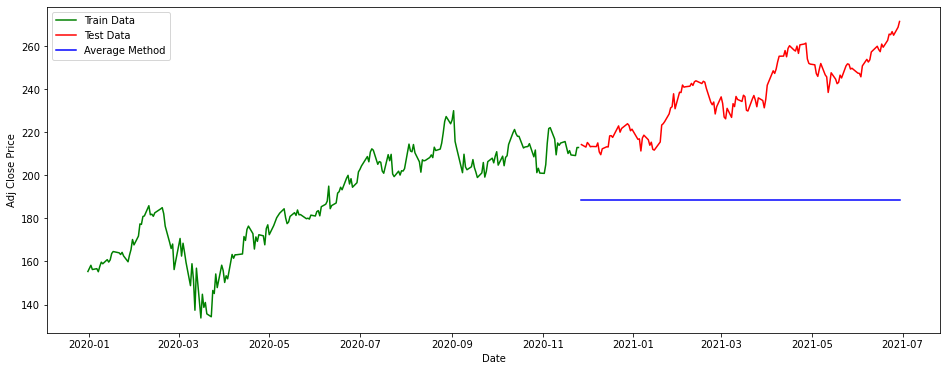

In [8]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [9]:
NFMeth = test.copy()

NFMeth['Adj Close'] = float(train.iloc[-1])

In [85]:
plt.figure(figsize=(16,6))
#plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

NameError: name 'test' is not defined

<Figure size 1152x432 with 0 Axes>

In [11]:
SNFMeth = test.copy()

In [12]:
SNFMeth['Adj Close'] = df.iloc[200:200+147,].values

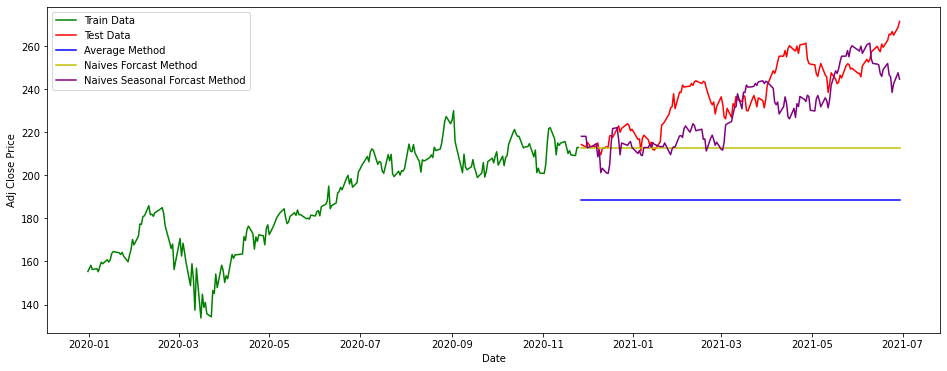

In [13]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y')
plt.plot(SNFMeth,label='Naives Seasonal Forcast Method',linestyle='-',color='purple')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### Drift Method

yt+h = yt = yt +h((yt-y1)/(T-1))

In [14]:
ff =[]
for i in range(1,148):
    ff.append(train.iloc[-1]['Adj Close'] + (i * ((train.iloc[-1]['Adj Close'] - train.iloc[0]['Adj Close'])/229)))

In [15]:
DRFTM = test.copy()
DRFTM['Adj Close']= np.asarray(ff)

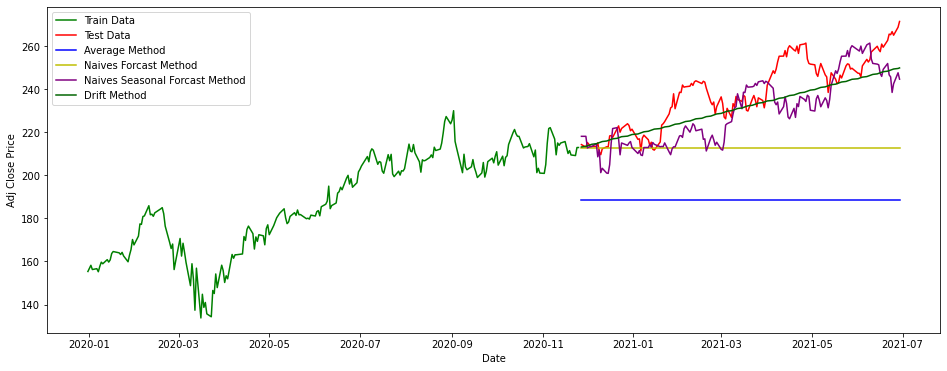

In [16]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y')
plt.plot(SNFMeth,label='Naives Seasonal Forcast Method',linestyle='-',color='purple')
plt.plot(DRFTM,label='Drift Method',linestyle='-',color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [17]:
fg = []
fg.append(df.iloc[297,0])
fg.append(df.iloc[298,0])
fg.append(df.iloc[299,0])
for i in range(2,146):
    fg.append((fg[i]+fg[i-1]+fg[i-2])/3)
#fg

In [18]:
SMAM = test.copy()
SMAM['Adj Close']= np.asarray(fg)

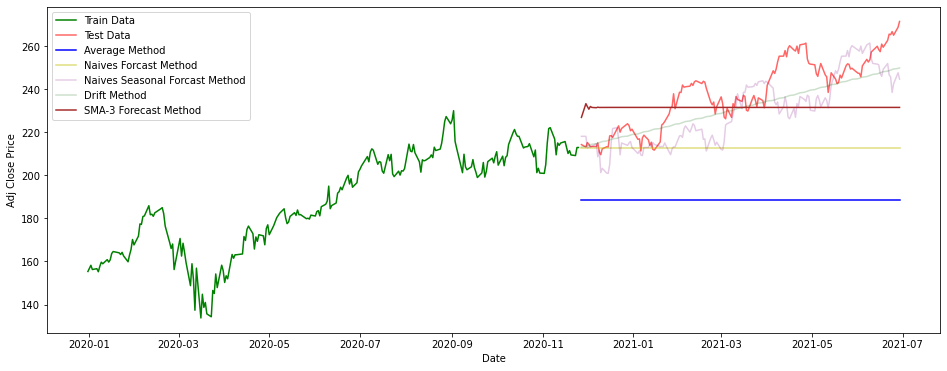

In [19]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r',alpha=0.6)
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y',alpha=0.5)
plt.plot(SNFMeth,label='Naives Seasonal Forcast Method',linestyle='-',color='purple',alpha=0.2)
plt.plot(DRFTM,label='Drift Method',linestyle='-',color='darkgreen',alpha=0.2)
plt.plot(SMAM,label='SMA-3 Forecast Method',linestyle='-',color='brown')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [20]:
fl = []
fl.append(df.iloc[295,0])
fl.append(df.iloc[296,0])
fl.append(df.iloc[297,0])
fl.append(df.iloc[298,0])
fl.append(df.iloc[299,0])
for i in range(4,146):
    fl.append((fl[i]+fl[i-1]+fl[i-2]+fl[i-3]+fl[i-4])/5)
SMAM5 = test.copy()
SMAM5['Adj Close']= np.asarray(fl)

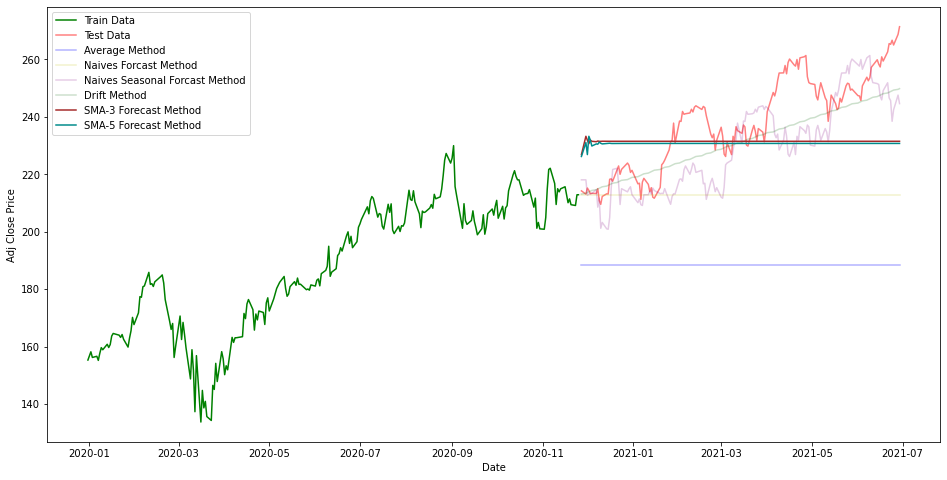

In [22]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r',alpha=0.5)
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b',alpha=0.3)
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y',alpha=0.2)
plt.plot(SNFMeth,label='Naives Seasonal Forcast Method',linestyle='-',color='purple',alpha=0.2)
plt.plot(DRFTM,label='Drift Method',linestyle='-',color='darkgreen',alpha=0.2)
plt.plot(SMAM,label='SMA-3 Forecast Method',linestyle='-',color='brown')
plt.plot(SMAM5,label='SMA-5 Forecast Method',linestyle='-',color='darkcyan')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [23]:
c = [AvgMeth,NFMeth,SNFMeth,DRFTM,SMAM,SMAM5]

mapeALL =[]
for i in c:
    actual = test['Adj Close']
    pred = i['Adj Close']
    mapeALL.append(np.mean(np.abs( (actual-pred)/actual ))*100)

In [24]:
c = [AvgMeth,NFMeth,SNFMeth,DRFTM,SMAM,SMAM5]

rmseALL =[]
for i in c:
    actual = test['Adj Close']
    pred = i['Adj Close']
    rmseALL.append(np.sqrt(mean_squared_error(actual,pred)))

In [25]:
pd.DataFrame(data={'MAPE':mapeALL,'RMSE':rmseALL},index=[['Average Method',
                                                     'Naives Forcast Method',
                                                     'Naives Seasonal Forcast Method',
                                                    'Drift Method',
                                                    'SMA-3 Forecast Method',
                                                    'SMA-5 Forecast Method']])

,MAPE,RMSE
Average Method,20.583291,52.403014
Naives Forcast Method,10.315785,30.011067
Naives Seasonal Forcast Method,5.000078,14.777252
Drift Method,3.325146,10.543719
SMA-3 Forecast Method,6.072940,17.346538
SMA-5 Forecast Method,6.161689,17.641554


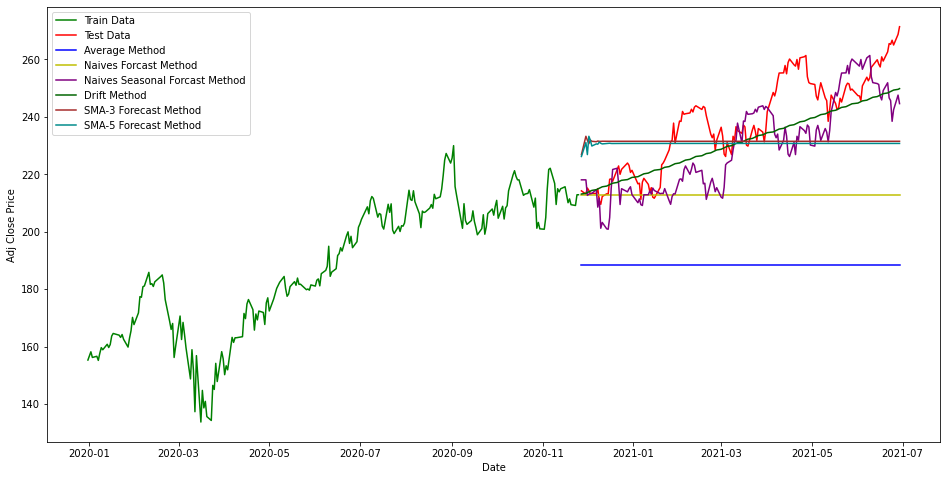

In [26]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(AvgMeth,label='Average Method',linestyle='-',color='b')
plt.plot(NFMeth,label='Naives Forcast Method',linestyle='-',color='y')
plt.plot(SNFMeth,label='Naives Seasonal Forcast Method',linestyle='-',color='purple')
plt.plot(DRFTM,label='Drift Method',linestyle='-',color='darkgreen')
plt.plot(SMAM,label='SMA-3 Forecast Method',linestyle='-',color='brown')
plt.plot(SMAM5,label='SMA-5 Forecast Method',linestyle='-',color='darkcyan')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### SES

In [27]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [28]:
SES = SimpleExpSmoothing(train).fit(optimized=True)

In [29]:
SES.params['smoothing_level']

0.7185261883123076

Alpha: 0.7185261883123076


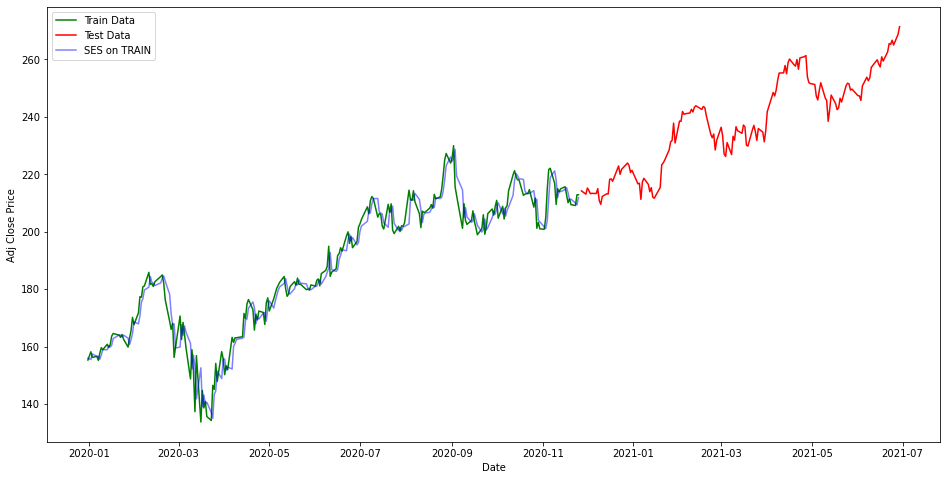

In [30]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',SES.params['smoothing_level'])
plt.plot(SES.fittedvalues,label='SES on TRAIN',linestyle='-',color='b',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [31]:
SESM =test.copy()

In [32]:
SESM['Adj Close'] = SES.forecast(len(test)).values

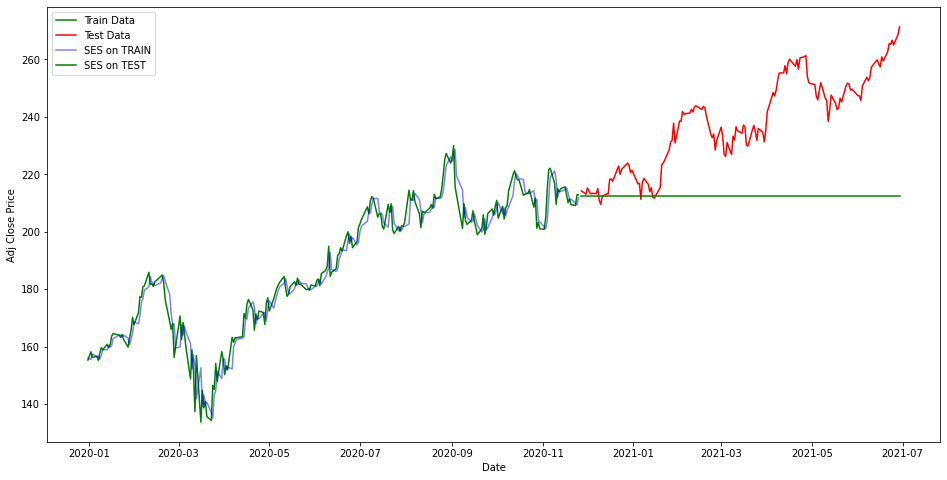

In [33]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(SES.fittedvalues,label='SES on TRAIN',linestyle='-',color='b',alpha=0.5)
plt.plot(SESM,label='SES on TEST',linestyle='-',color='green',alpha=1)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### DES

In [34]:
from statsmodels.tsa.api import Holt

In [35]:
DES = Holt(train).fit(optimized=True)

In [36]:
DES.fittedvalues

Date
2019-12-31    155.897777
2020-01-02    155.740547
2020-01-03    157.746975
2020-01-06    156.917109
2020-01-07    156.967251
                 ...    
2020-11-19    211.464811
2020-11-20    211.697735
2020-11-23    210.323194
2020-11-24    209.730291
2020-11-25    212.222829
Length: 230, dtype: float64

In [37]:
DES.params['smoothing_level']

0.7132877347848033

In [39]:
DES.params['smoothing_trend']

0.0

Alpha: 0.7132877347848033
Beta: 0.0


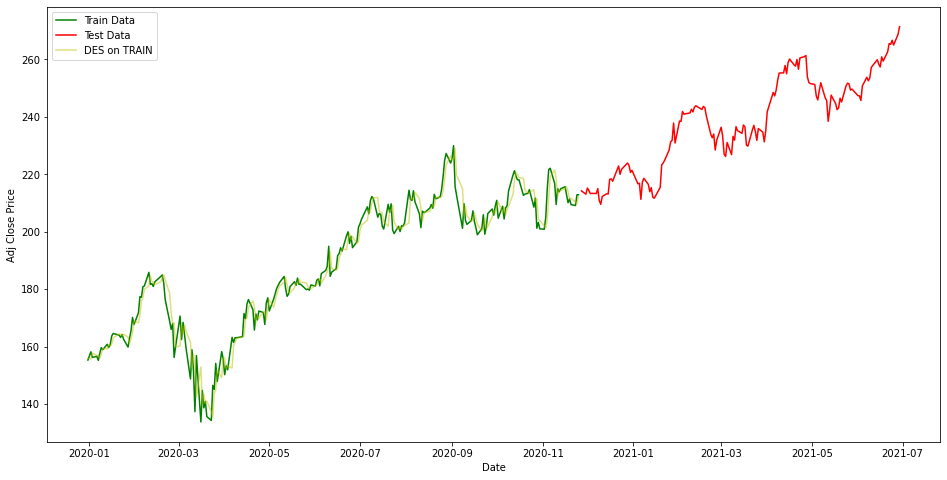

In [40]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(DES.fittedvalues,label='DES on TRAIN',linestyle='-',color='y',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [41]:
DESM =test.copy()

In [42]:
DESM['Adj Close'] = DES.forecast(len(test)).values

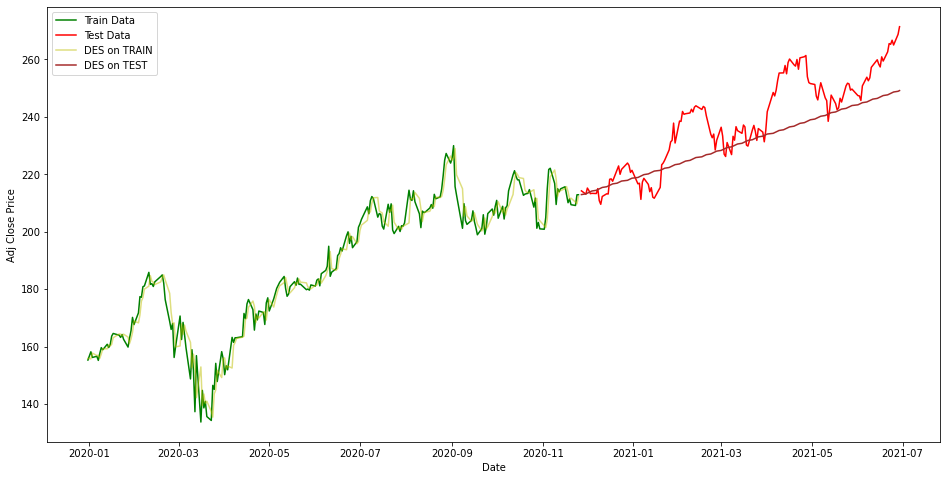

In [43]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(DES.fittedvalues,label='DES on TRAIN',linestyle='-',color='y',alpha=0.5)
plt.plot(DESM,label='DES on TEST',linestyle='-',color='brown',alpha=1)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### DES with Damped Trend

In [44]:
from statsmodels.tsa.api import Holt

In [45]:
DDES = Holt(train).fit(smoothing_level=0.9,smoothing_slope=0,damping_slope=0.7)

In [46]:
DDES.fittedvalues

Date
2019-12-31    155.570033
2020-01-02    155.603924
2020-01-03    158.195829
2020-01-06    156.682074
2020-01-07    156.894181
                 ...    
2020-11-19    210.695246
2020-11-20    211.619058
2020-11-23    209.892831
2020-11-24    209.469363
2020-11-25    212.786498
Length: 230, dtype: float64

In [47]:
DDES.params['smoothing_level']

0.9

In [48]:
DDES.params['smoothing_trend']

0.0

Alpha: 0.7132877347848033
Beta: 0.0


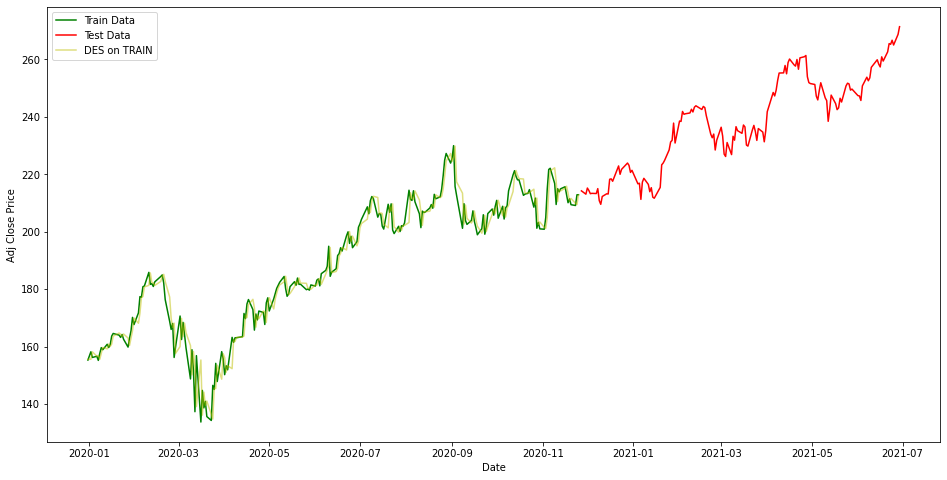

In [49]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(DDES.fittedvalues,label='DES on TRAIN',linestyle='-',color='y',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [50]:
DDESM =test.copy()

In [51]:
DDESM['Adj Close'] = DDES.forecast(len(test)).values

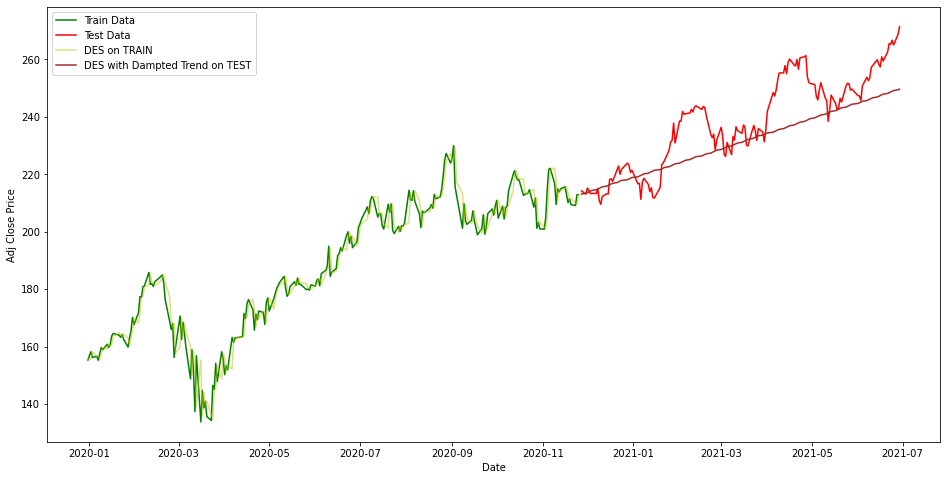

In [52]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(DDES.fittedvalues,label='DES on TRAIN',linestyle='-',color='y',alpha=0.5)
plt.plot(DDESM,label='DES with Dampted Trend on TEST',linestyle='-',color='brown',alpha=1)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### TES

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
TES1 = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=4)
TES2 = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=4)

TES1 = TES1.fit(optimized=True)
TES2 = TES2.fit(optimized=True)

TES1M = test.copy()
TES2M = test.copy()
TES1M['Adj Close'] = TES1.forecast(len(test)).values
TES2M['Adj Close'] = TES2.forecast(len(test)).values

for i in (TES1,TES2):
    print("Alpha",i.params['smoothing_level'])
    print("Beta",i.params['smoothing_trend'])
    print("Gamma",i.params['smoothing_seasonal'])
    print("-------------------------------------")

print(np.sqrt(mean_squared_error(train,TES1.fittedvalues)))
print(np.sqrt(mean_squared_error(train,TES2.fittedvalues)))

print(np.sqrt(mean_squared_error(test,TES1M['Adj Close'])))
print(np.sqrt(mean_squared_error(test,TES2M['Adj Close'])))

Alpha 0.7167448660660375
Beta 8.920150106698568e-07
Gamma 1.512189371149174e-07
-------------------------------------
Alpha 0.7170853018602139
Beta 1.1192878947615121e-08
Gamma 1.7845749441598934e-09
-------------------------------------
4.6184463663047675
4.617745038190698
10.495392098228113
10.591484064218642


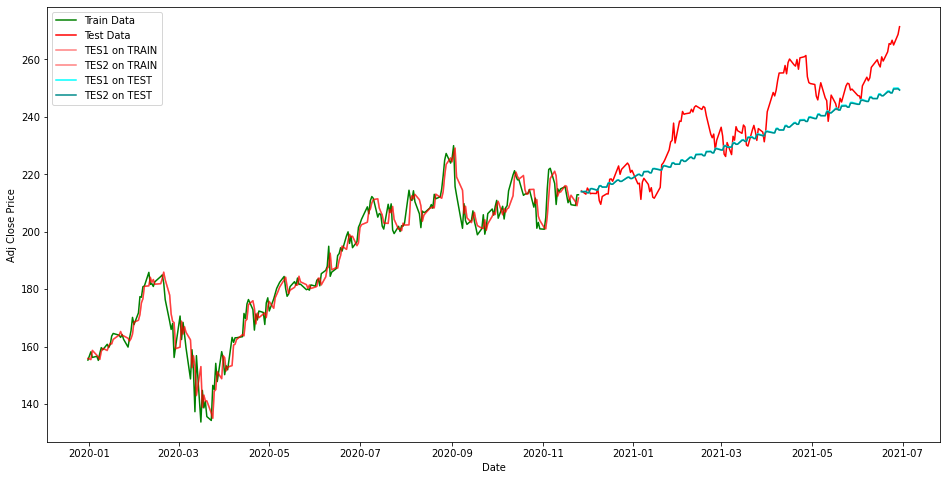

In [55]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(TES1.fittedvalues,label='TES1 on TRAIN',linestyle='-',color='red',alpha=0.5)
plt.plot(TES2.fittedvalues,label='TES2 on TRAIN',linestyle='-',color='red',alpha=0.5)
plt.plot(TES1M,label='TES1 on TEST',linestyle='-',color='cyan')
plt.plot(TES2M,label='TES2 on TEST',linestyle='-',color='darkcyan')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [56]:
c = [SES,DES,DDES,TES1,TES2]

trmseALL =[]
for i in c:
    actual = train['Adj Close']
    pred = i.fittedvalues
    trmseALL.append(np.mean(np.abs( (actual-pred)/actual ))*100)

c = [SESM,DESM,DDESM,TES1M,TES2M]

mapeALL =[]
for i in c:
    actual = test['Adj Close']
    pred = i['Adj Close']
    mapeALL.append(np.mean(np.abs( (actual-pred)/actual ))*100)

c = [SESM,DESM,DDESM,TES1M,TES2M]

rmseALL =[]
for i in c:
    actual = test['Adj Close']
    pred = i['Adj Close']
    rmseALL.append(np.sqrt(mean_squared_error(actual,pred)))

pd.DataFrame(data={'MAPE':mapeALL,'Train RMSE':trmseALL,'Test RMSE':rmseALL},index=[['Simple Exponential Smoothing',
                                                     'Double Exponential Smoothing',
                                                     'Double Exponential Smoothing with Damped Trend',
                                                    'Triple Exponential Smoothing-1',
                                                    'Triple Exponential Smoothing-2',
                                                    ]])

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
plt.rcParams.update({'figure.figsize':(10,10)})

Text(0.5, 1.0, 'Additive Decomposition')

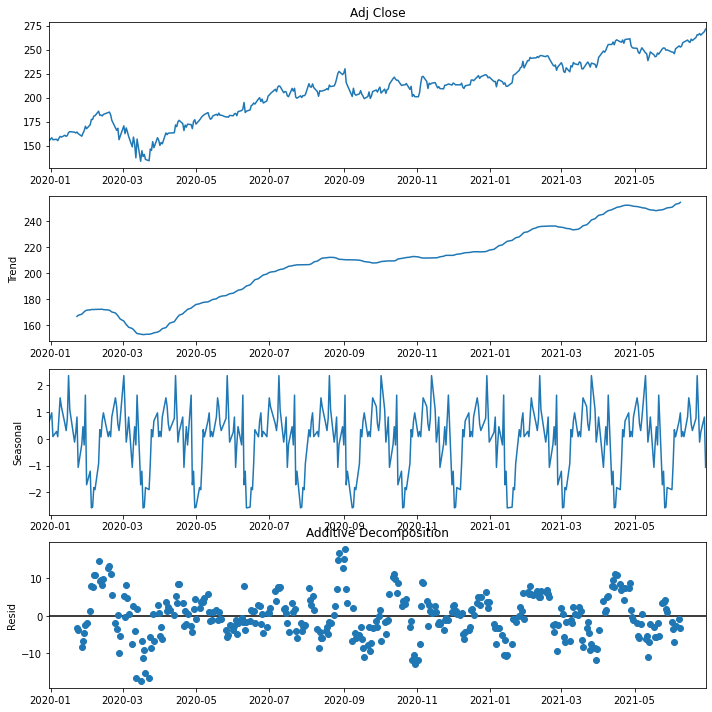

In [62]:
decomp_A = seasonal_decompose(df['Adj Close'],model='Additive',period=30)
decomp_A.plot()
plt.title('Additive Decomposition')

Text(0.5, 1.0, 'Multiplicative Decomposition')

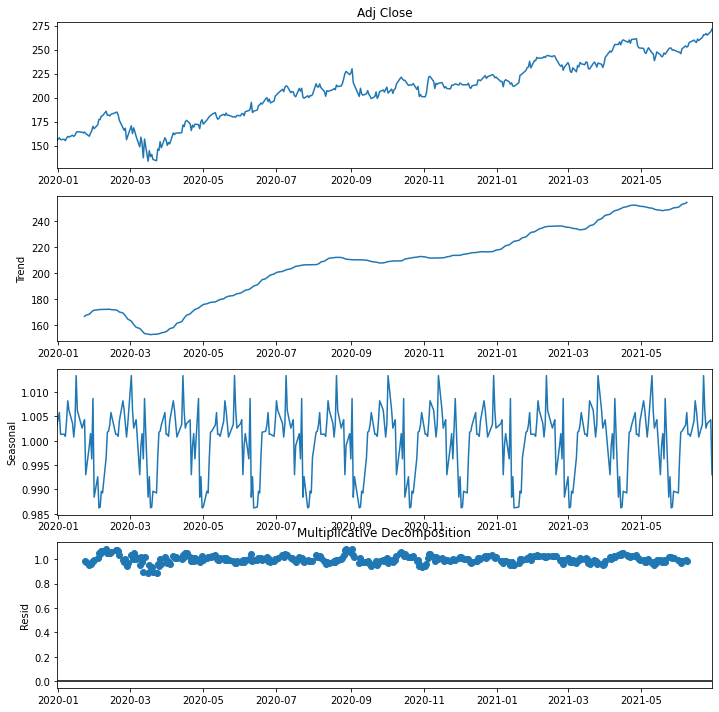

In [63]:
decomp_M = seasonal_decompose(df['Adj Close'],model='multiplicative',period=30)

decomp_M.plot()
plt.title('Multiplicative Decomposition')

### Stationarity Test

#### Mean comparison between the first half and second half of the TS

print("Mean :",np.mean(df['Adj Close'].iloc[0:189,]), np.mean(df['Adj Close'].iloc[188:,]))

#### Statistical Tests

t, p = stats.ttest_rel(df['Adj Close'].iloc[0:189,], df['Adj Close'].iloc[188:,])
print(f"T-stat: {t},P value: {p}")

ztest ,pval1 = stests.ztest(df['Adj Close'].iloc[0:189,], x2=df['Adj Close'].iloc[188:,], 
                            value=0,alternative='two-sided')
print(f"Z-stat: {ztest},P value: {pval1}")

#### Dicky-Fuller Test

dit = {}
c = ["ADF Statistic", "p-value"]
j=0
for i in adfuller(df.values)[:2]:
    dit[c[j]]=i
    j+=1
dit

In [68]:
df.diff()

,Adj Close
Date,
2019-12-31,NaN
2020-01-02,2.876129
2020-01-03,-1.969940
2020-01-06,0.403870
2020-01-07,-1.428238
...,...
2021-06-23,-0.240021
2021-06-24,1.420013
2021-06-25,-1.670013


#### Tranforming to Stationary

#### Log Transformation

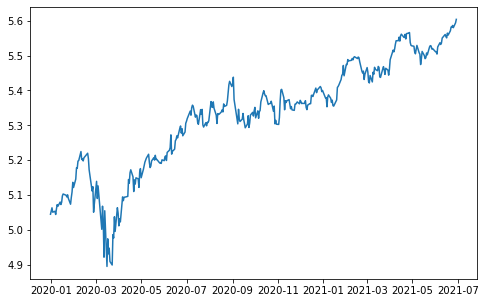

In [69]:
LOG = np.log(df)

plt.figure(figsize=(8,5))
plt.plot(LOG)

In [70]:
dit = {}
c = ["ADF Statistic", "p-value"]
j=0
for i in adfuller(LOG.iloc[10:,])[:2]:
    dit[c[j]]=i
    j+=1
dit

{'ADF Statistic': -1.0660644875866319, 'p-value': 0.7284135897826272}

#### Differencing

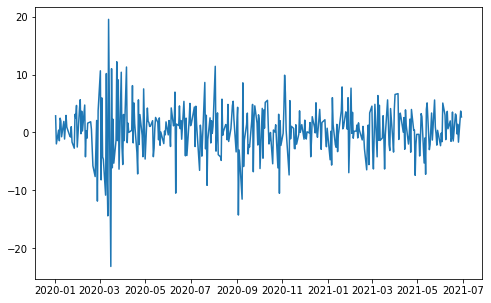

In [71]:
DIFF1 = df.diff()

plt.figure(figsize=(8,5))
plt.plot(DIFF1)

In [72]:
dit = {}
c = ["ADF Statistic", "p-value"]
j=0
for i in adfuller(DIFF1.iloc[10:,])[:2]:
    dit[c[j]]=i
    j+=1
dit

{'ADF Statistic': -5.612313198368046, 'p-value': 1.1957595821866553e-06}

#### Mean comparison between the first half and second half of the TS

In [73]:
print("Mean :",np.mean(DIFF1['Adj Close'].iloc[1:189,]), np.mean(DIFF1['Adj Close'].iloc[189:,]))

Mean : 0.2682925285177028 0.3491029942289312


#### Statistical Tests

In [74]:
t, p = stats.ttest_rel(DIFF1['Adj Close'].iloc[1:189,], DIFF1['Adj Close'].iloc[189:,])
print(f"T-stat: {t},P value: {p}")

T-stat: -0.18135382791161223,P value: 0.8562862743601348


In [75]:
ztest ,pval1 = stests.ztest(DIFF1['Adj Close'].iloc[1:189,], x2=DIFF1['Adj Close'].iloc[189:,], 
                            value=0,alternative='two-sided')
print(f"Z-stat: {ztest},P value: {pval1}")

Z-stat: -0.18112207613608314,P value: 0.856271756916651


#### ARIMA models

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [77]:
DIFF1 = DIFF1.iloc[1:,]

In [78]:
DIFF1

,Adj Close
Date,
2020-01-02,2.876129
2020-01-03,-1.969940
2020-01-06,0.403870
2020-01-07,-1.428238
2020-01-08,2.472275
...,...
2021-06-23,-0.240021
2021-06-24,1.420013
2021-06-25,-1.670013


In [79]:
plt.rcParams.update({'figure.figsize':(5,5)})

Text(0.5, 1.0, 'ACF')

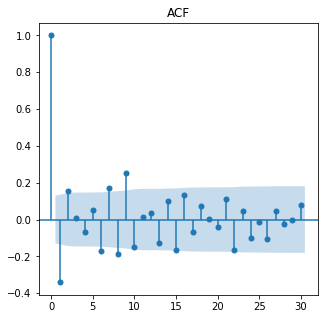

In [80]:
plot_acf(train.diff().dropna(),lags=30)
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

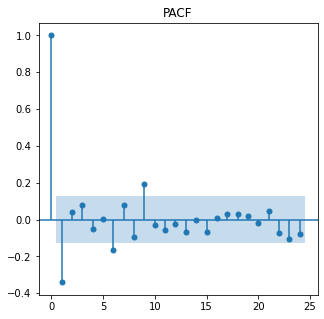

In [81]:
plot_pacf(train.diff().dropna(),method='ols')
plt.title('PACF')

In [82]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
model = ARIMA(train,order=(1,1,0))

In [84]:
model = model.fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  229
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -675.358
Method:                       css-mle   S.D. of innovations              4.618
Date:                Tue, 03 Aug 2021   AIC                           1356.716
Time:                        08:52:33   BIC                           1367.017
Sample:                             1   HQIC                          1360.871
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2487      0.228      1.091      0.275      -0.198       0.695
ar.L1.D.Adj Close    -0.3406      0.062     -5.496      0.000      -0.462      -0.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9362           +0.0000j            2.9362            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, '')

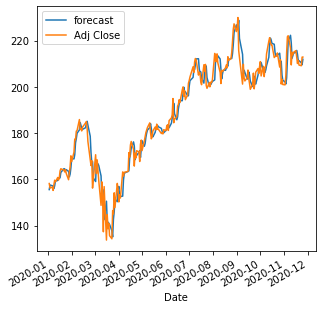

In [86]:
model.plot_predict()
plt.title('')

In [87]:
ARIMA1 = test.copy()

In [88]:
ARIMA1['Adj Close'] = model.forecast(len(test))[0]

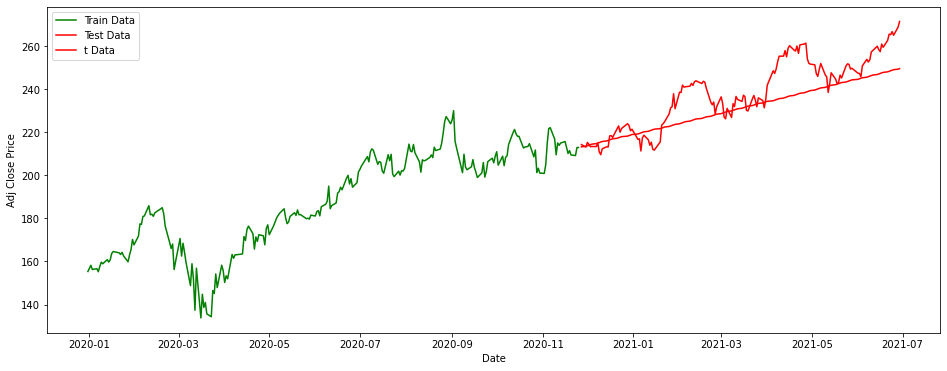

In [89]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(ARIMA1,label='t Data',linestyle='-',color='r')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [90]:
np.sqrt(mean_squared_error(test.values,ARIMA1.values))

10.670163316483219

#### Auto ARIMA

In [91]:
from pmdarima import auto_arima

In [92]:
model1 = auto_arima(train,
                    start_p=0,start_q=0,
                    max_p=3,max_q=3,m=12,
                    trace=True,seasonal=False,
                    information_criterion='aic'
                    ,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1383.049, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1356.716, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1361.705, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1381.647, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1358.341, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1358.465, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1359.996, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1355.901, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1357.434, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1357.595, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1360.955, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1359.004, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.743 seconds


In [93]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -675.951
Date:                Tue, 03 Aug 2021   AIC                           1355.901
Time:                        08:52:35   BIC                           1362.768
Sample:                             0   HQIC                          1358.671
                                - 230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3373      0.043     -7.814      0.000      -0.422      -0.253
sigma2        21.4364      1.497     14.317      0.000      18.502      24.371
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                41.77
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.45
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
modelA1 = ARIMA(train,order=(1,1,0))

In [95]:
modelA1 = modelA1.fit()

In [96]:
modelA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  229
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -675.358
Method:                       css-mle   S.D. of innovations              4.618
Date:                Tue, 03 Aug 2021   AIC                           1356.716
Time:                        08:52:35   BIC                           1367.017
Sample:                             1   HQIC                          1360.871
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2487      0.228      1.091      0.275      -0.198       0.695
ar.L1.D.Adj Close    -0.3406      0.062     -5.496      0.000      -0.462      -0.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9362           +0.0000j            2.9362            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
ARIMA2 = test.copy()

In [98]:
ARIMA2['Adj Close'] = modelA1.forecast(len(test))[0]

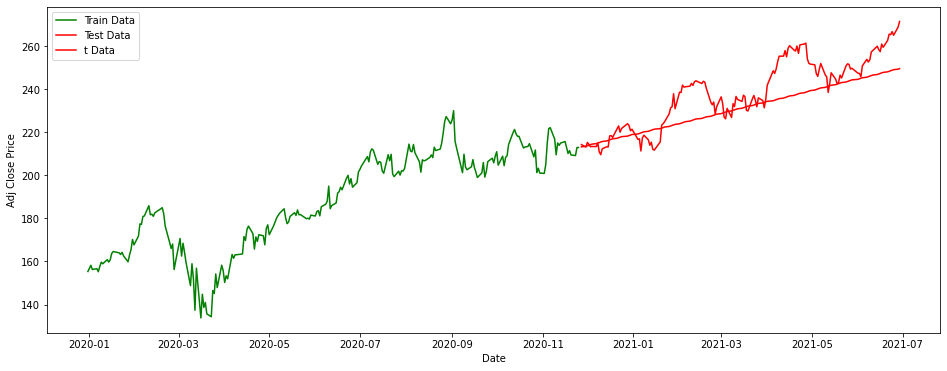

In [99]:
plt.figure(figsize=(16,6))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(ARIMA2,label='t Data',linestyle='-',color='r')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [100]:
np.sqrt(mean_squared_error(test.values,ARIMA2.values))

10.670163316483219

#### Granger Causality

Ho: Adj CLose Price does not Granger cause Open Price

Ha: Adj Close Price Granger causes Open Price

In [26]:
df2 = yfinance.download(['MSFT'],start='2010-07-01',end='2012-7-01')[['Open','Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [27]:
df2

,Open,Adj Close
Date,,
2010-06-30,23.299999,18.003220
2010-07-01,23.090000,18.120586
2010-07-02,23.360001,18.206648
2010-07-06,23.700001,18.636972
2010-07-07,23.820000,19.012527
...,...,...
2012-06-25,30.299999,24.587656
2012-06-26,30.000000,24.711134
2012-06-27,30.190001,24.834606


In [28]:
plt.rcParams.update({'figure.figsize':(10,5)})

<AxesSubplot:xlabel='Date'>

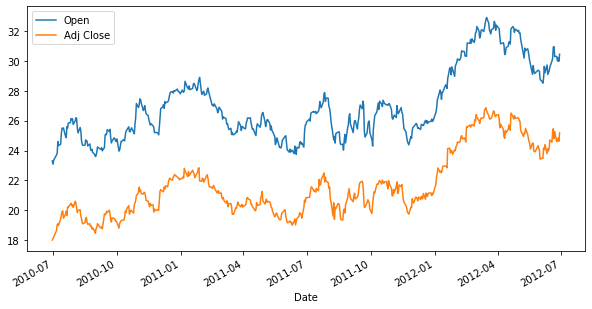

In [43]:
df2.plot()

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests,adfuller

In [31]:
def DF(ts):
    dit = {}
    c = ["ADF Statistic", "p-value"]
    j=0
    for i in adfuller(ts.values)[:2]:
        dit[c[j]]=i
        j+=1
    return dit

In [33]:
DF(df2['Open'])

{'ADF Statistic': -1.8614170603267488, 'p-value': 0.3504236229952371}

In [34]:
DF(df2['Adj Close'])

{'ADF Statistic': -1.5025837978914247, 'p-value': 0.5322327860030923}

In [35]:
df2_diff = df2.copy()

In [36]:
for i in df2.columns:
    df2_diff[i] = df2_diff[i].diff()

In [37]:
df2_diff.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

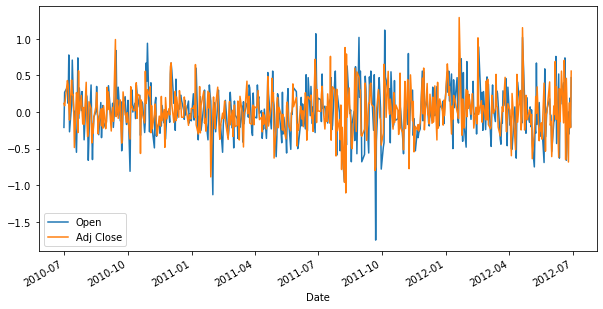

In [38]:
df2_diff.plot()

In [40]:
DF(df2_diff['Open'])

{'ADF Statistic': -20.639386269014246, 'p-value': 0.0}

In [41]:
DF(df2_diff['Adj Close'])

{'ADF Statistic': -24.060306501915555, 'p-value': 0.0}

In [63]:
grangercausalitytests(df2_diff[['Open','Adj Close']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=460.5406, p=0.0000  , df_denom=501, df_num=1
ssr based chi2 test:   chi2=463.2983, p=0.0000  , df=1
likelihood ratio test: chi2=328.5731, p=0.0000  , df=1
parameter F test:         F=460.5406, p=0.0000  , df_denom=501, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=318.9787, p=0.0000  , df_denom=498, df_num=2
ssr based chi2 test:   chi2=644.3626, p=0.0000  , df=2
likelihood ratio test: chi2=414.7894, p=0.0000  , df=2
parameter F test:         F=318.9787, p=0.0000  , df_denom=498, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=226.3190, p=0.0000  , df_denom=495, df_num=3
ssr based chi2 test:   chi2=688.5584, p=0.0000  , df=3
likelihood ratio test: chi2=433.5159, p=0.0000  , df=3
parameter F test:         F=226.3190, p=0.0000  , df_denom=495, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=183.1307, p=0.0000  

{1: ({'ssr_ftest': (460.5406019836548, 6.11898976389299e-73, 501.0, 1),
   'ssr_chi2test': (463.2983301392456, 9.207106675456539e-103, 1),
   'lrtest': (328.5730681654752, 1.9659706346186948e-73, 1),
   'params_ftest': (460.5406019836547, 6.11898976389299e-73, 501.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (318.97872685349245, 6.6827008868438895e-90, 498.0, 2),
   'ssr_chi2test': (644.3626490253281, 1.1979221406874954e-140, 2),
   'lrtest': (414.78942762267116, 8.503940557952886e-91, 2),
   'params_ftest': (318.9787268534928, 6.68270088684256e-90, 498.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (226.31898517792968, 2.030038895864358e-92, 495.0, 3),
   'ssr_chi2test': (688.5583670261861, 6.3531655077105796e-149, 3),
   'lrtest': (433.5159413221288, 1.2152073379086672e-93, 3),
   'params_ftest': (226.31898517792987, 2.030038895864243e-92, 495.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

###### We can say that Adj Close Price granger causes Open Price

### VAR

In [67]:
from statsmodels.tsa.api import VAR

In [68]:
df_train, df_test = df2[0:-30], df2[-30:]
print(df_train.shape)
print(df_test.shape)

(476, 2)
(30, 2)


In [69]:
model = VAR(df_train.diff().dropna())
for i in range(1,7):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)

Lag Order = 1
AIC :  -5.541198426275916
Lag Order = 2
AIC :  -5.74940961669761
Lag Order = 3
AIC :  -5.793193727644458
Lag Order = 4
AIC :  -5.887886735858696
Lag Order = 5
AIC :  -5.907019153539612
Lag Order = 6
AIC :  -5.911059866442466


In [70]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-4.732,-4.714,0.008810,-4.725
1,-5.546,-5.492,0.003904,-5.525
2,-5.749,-5.660,0.003185,-5.714
3,-5.795,-5.670,0.003044,-5.745
4,-5.885,-5.724*,0.002780,-5.822
5,-5.905,-5.708,0.002726,-5.827*
6,-5.911,-5.679,0.002709,-5.820
7,-5.911*,-5.643,0.002709*,-5.806
8,-5.903,-5.599,0.002732,-5.783
9,-5.907,-5.568,0.002720,-5.773


In [71]:
model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Aug, 2021
Time:                     21:21:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.64750
Nobs:                     468.000    HQIC:                  -5.80879
Log likelihood:           85.6165    FPE:                 0.00270301
AIC:                     -5.91343    Det(Omega_mle):      0.00253773
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.004823         0.009965           -0.484           0.628
L1.Open             -0.736295         0.058439          -12.599           0.000
L1.Adj Close         1.106943         0.042031           26.336  

In [72]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

In [73]:
out

array([2.01671949, 2.00445523])

In [74]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order) 

7


In [75]:
# Input data for forecasting
forecast_input = df_train.diff().dropna().values[-lag_order:]
forecast_input

array([[-0.28999901,  0.21262741],
       [ 0.67000008, -0.01635361],
       [-0.17000008,  0.34346962],
       [ 0.12999916, -0.39253998],
       [-0.18000031, -0.2222538 ],
       [-0.32999992, -0.25517845],
       [-0.31999969, -0.14816475]])

In [76]:
fc = model_fitted.forecast(y=forecast_input, steps=30)
df_forecast = pd.DataFrame(fc, index=df_test.index[-30:], columns=df2.columns)
df_forecast.head()

,Open,Adj Close
Date,,
2012-05-18,-0.206411,0.034312
2012-05-21,0.052164,0.036271
2012-05-22,0.096152,0.039744
2012-05-23,0.012896,-0.041985
2012-05-24,-0.006308,-0.007573


In [77]:
dfforecastINV = df_forecast.copy()
for col in df_train.columns:        
    dfforecastINV[col] = df_train[col].iloc[-1] + dfforecastINV[col].cumsum()

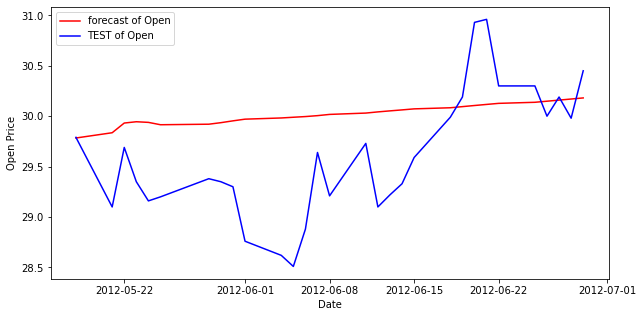

In [80]:
plt.plot(dfforecastINV['Open'],color='r',label='forecast of Open')
plt.plot(df_test['Open'],color='b',label='TEST of Open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

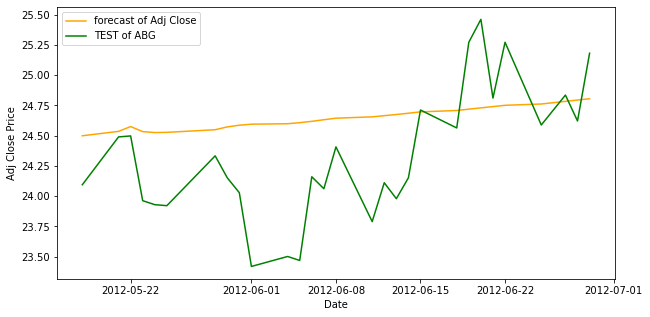

In [81]:
plt.plot(dfforecastINV['Adj Close'],color='orange',label='forecast of Adj Close')
plt.plot(df_test['Adj Close'],color='g',label='TEST of ABG')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [83]:
np.sqrt(mean_squared_error(df_test['Open'],dfforecastINV['Open']))

0.7002538896234276

In [84]:
np.sqrt(mean_squared_error(df_test['Adj Close'],dfforecastINV['Adj Close']))

0.5596029896362078

### ARCH

In [136]:
df2 = yfinance.download('MSFT',start='2018-04-01',end='2021-06-30')
df2 = df2['Adj Close']
df2 = pd.DataFrame(df2)
df2

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-04-02,84.853752
2018-04-03,85.994461
2018-04-04,88.505959
2018-04-05,88.553864
2018-04-06,86.492928
...,...
2021-06-23,265.269989
2021-06-24,266.690002
2021-06-25,265.019989


Text(0.5, 1.0, 'Daily Returns of MSFT')

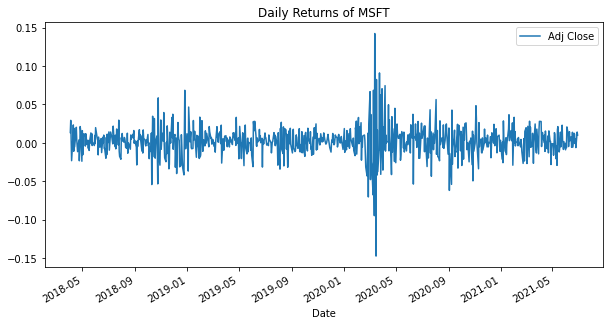

In [137]:
df3 = df2.pct_change(1).dropna()
df3.plot()
plt.title('Daily Returns of MSFT')

#### Stationary Test

In [138]:
DF(df3)

{'ADF Statistic': -9.438897906268004, 'p-value': 4.955842133698204e-16}

Text(0.5, 1.0, 'ACF')

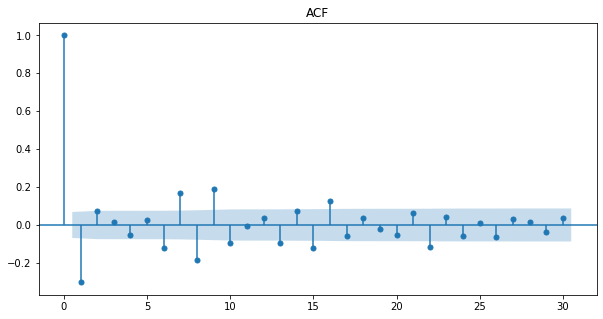

In [139]:
plot_acf(df3)
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

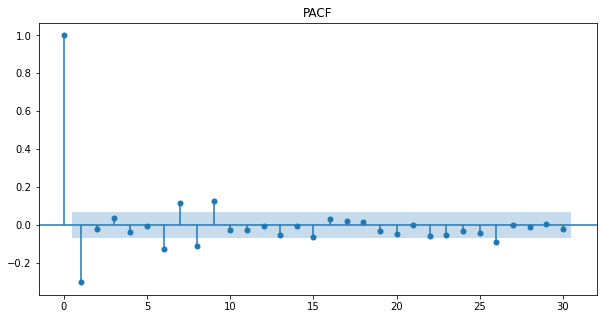

In [140]:
plot_pacf(df3)
plt.title('PACF')

###### squared Deviation

Text(0.5, 1.0, 'ACF')

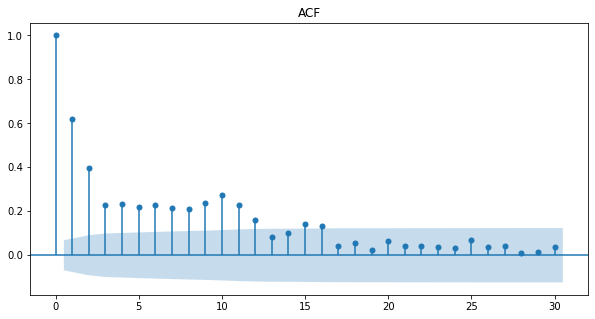

In [141]:
plot_acf((df3-np.mean(df3))**2)
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

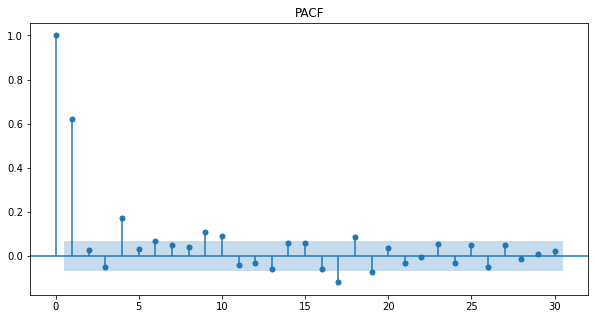

In [142]:
plot_pacf((df3-np.mean(df3))**2)
plt.title('PACF')

In [143]:
mod = auto_arima(df2, start_p=2, d=1, start_q=2, max_p=5, max_q=5,
           start_P=1, D=None, start_Q=1, max_P=2, max_Q=2, 
           max_order=5, m=1, seasonal=True, stationary=False, 
           information_criterion='aic',trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4148.207, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4200.584, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4143.387, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4148.680, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4202.849, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4145.318, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4145.332, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4147.131, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4148.608, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.955 seconds


In [144]:
mod1 = ARIMA(df2,order=(1,1,0))

In [145]:
mod1 = mod1.fit()

In [146]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  817
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2068.693
Method:                       css-mle   S.D. of innovations              3.044
Date:                Tue, 03 Aug 2021   AIC                           4143.386
Time:                        08:55:09   BIC                           4157.503
Sample:                             1   HQIC                          4148.804
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2275      0.084      2.700      0.007       0.062       0.393
ar.L1.D.Adj Close    -0.2643      0.034     -7.836      0.000      -0.330      -0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.7833           +0.0000j            3.7833            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

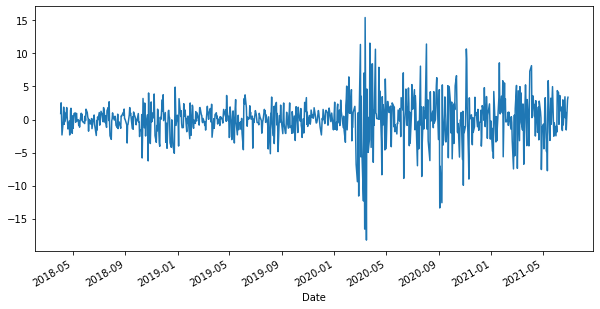

In [147]:
mod1.resid.plot()

Text(0.5, 1.0, 'ACF')

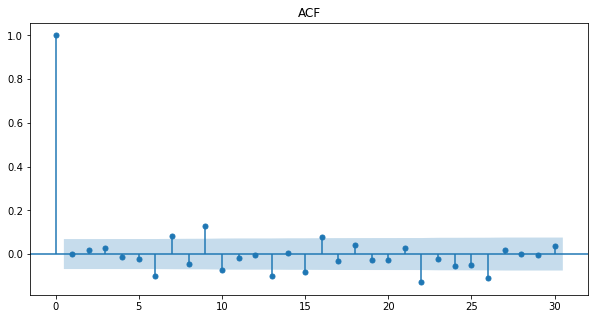

In [148]:
plot_acf(mod1.resid)
plt.title('ACF')

q: The number of lag squared residual errors to include in the ARCH model.

In [242]:
Train, Test = df3[:-100], df3[-100:]

Iteration:      1,   Func. Count:      4,   Neg. LLF: -1900.394467340194
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1900.3944674116262
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


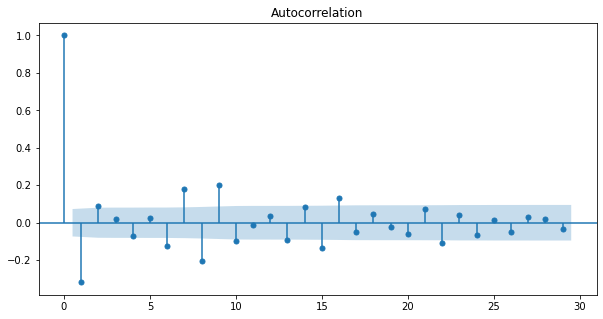

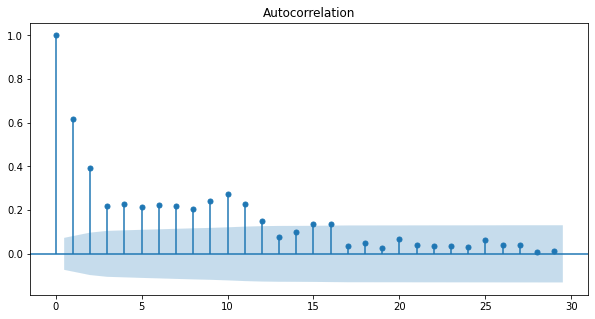

In [285]:
from arch import arch_model

model = arch_model(Train.values, mean='Zero', vol='ARCH',p=2)
x = model.fit()
#x.summary()
#x.resid
plot_acf(x.resid);
plot_acf(x.resid**2);

In [286]:
yhat = x.forecast(horizon=100)

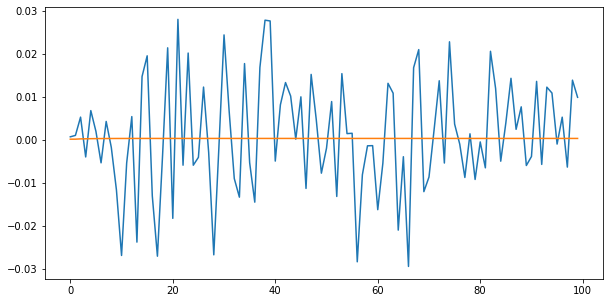

In [287]:
plt.plot(Test.values)
plt.plot(yhat.variance.values[-1])

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2179464.4136480615
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2563.629663782841
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2563.629663782841
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2563.629663782841
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1937.8450184978333
            Iterations: 4
            Function evaluations: 45
            Gradient evaluations: 4


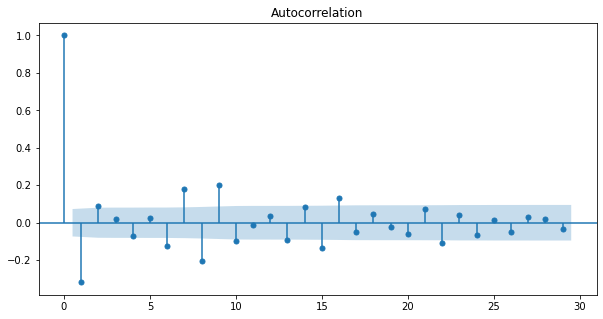

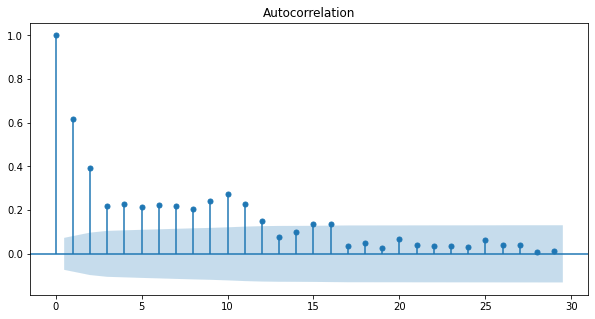

In [288]:
model = arch_model(Train.values, mean='Zero', vol='GARCH',p=2,q=2)
x = model.fit()
#x.summary()
#x.resid
x.aic
plot_acf(x.resid);
plot_acf(x.resid**2);

In [289]:
yhat1 = x.forecast(horizon=100)

In [290]:
import warnings
warnings.filterwarnings('ignore')

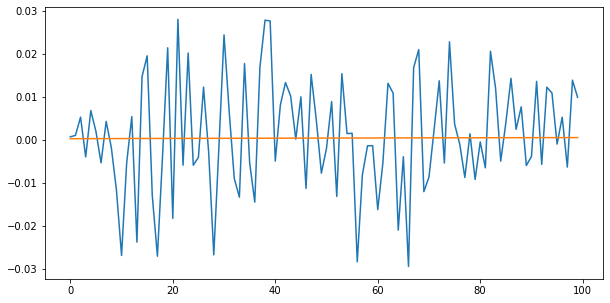

In [291]:
plt.plot(Test.values)
plt.plot(yhat1.variance.values[-1])

In [292]:
# tests
# Engle’s ARCH test assesses the null hypothesis that a series of residuals (rt) 
# exhibits no conditional heteroscedasticity (ARCH effects), 
# against the alternative that an ARCH(L) model describes the series.

from statsmodels.stats.diagnostic import het_arch
archtest = het_arch(x.resid)
print('p value is :',archtest[1])

p value is : 1.5594711182519807e-53
